In [245]:
#Laos Small Group Project

#This python script models the Laotian power network in 2050 following the Net-Zero Scenario data proposed by the team. The domestic network
#is simplified into 4 regions (North, Central 1, Central 2, South), and generation is distributed along them according to previously identified
#renewable energy potential and land constraints.

#Domestic demand in 2050 is distributed across the 4 regions proportionally to population
#Export demand is based on export commitments to Thailand, Vietnam, China, Myanmar, and Cambodia and following existing infrastructures

#Local voltage levels are at 115kV, while exports to Vietnam and Thailand are at 230kV, with 3 transformers used to upgrade voltage levels

#All input parameters are available in the excel sheet "laos Python Model Inputs" also available in the same GitHub folder

In [246]:
# Import libraries
import pandas as pd
import pandapower as pp
from pandapower.plotting.plotly import simple_plotly

In [247]:
# Create network
net = pp.create_empty_network() 


In [248]:
#Read bus data from excel
bus_df=pd.read_excel(r"C:\Users\User\Downloads\bolivia python input.xlsx", sheet_name='buses',nrows=15)
#bus_df

In [249]:
# Create buses
b = {}

for i in bus_df['bus_id']:
  b[i] = pp.create_bus(net, vn_kv = bus_df.loc[bus_df['bus_id']==i, 'vn_kv'].values[0], name = bus_df.loc[bus_df['bus_id']==i, 'name'].values[0], geodata = eval(bus_df.loc[bus_df['bus_id']==i, 'geodata'].values[0]),min_vm_pu=0.85)
net.bus

,name,vn_kv,type,zone,in_service,min_vm_pu
0,La Paz,230.0,b,None,True,0.85
1,Pando,230.0,b,None,True,0.85
2,Beni,230.0,b,None,True,0.85
3,Oruro,230.0,b,None,True,0.85
4,Cochabamba,230.0,b,None,True,0.85
5,Santa Cruz,230.0,b,None,True,0.85
6,Potosi,115.0,b,None,True,0.85
7,Chuquisaca,230.0,b,None,True,0.85
8,Tarija,230.0,b,None,True,0.85
9,trafo02,115.0,b,None,True,0.85


In [250]:
# Create one grid connection point
connect_bus = b[0] 
vm_pu = 1.1

# Create the external grid connection
pp.create_ext_grid(net, bus=connect_bus, vm_pu=vm_pu, name = "Slack bus")

0

In [251]:
# Import line data from excel file-- from_bus, to_bus, length_km, r_ohm_per_km, x_ohm_per_km, c_nf_per_km, max_i_ka

line_df = pd.read_excel(r"C:\Users\User\Downloads\bolivia python input.xlsx", sheet_name='lines',nrows=12)
#line_df

In [252]:
# Create lines
for i in line_df.index:
  pp.create_line_from_parameters(net, from_bus=b[line_df.loc[i, 'from_bus']],
                                 to_bus=b[line_df.loc[i, 'to_bus']],
                                 length_km=line_df.loc[i, 'length_km'],
                                 r_ohm_per_km=line_df.loc[i, 'r_ohm_per_km'],
                                 x_ohm_per_km=line_df.loc[i, 'x_ohm_per_km'],
                                 c_nf_per_km=line_df.loc[i, 'c_nf_per_km'],
                                 max_i_ka=line_df.loc[i, 'max_i_ka']
                                 ) 
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,None,None,2,0,477.0,0.03806,0.222438,0.000008,0.0,1.510,1.0,1,None,True
1,None,None,0,3,286.0,0.02953,0.213900,0.000008,0.0,1.815,1.0,1,None,True
2,None,None,0,4,298.0,0.02953,0.213900,0.000008,0.0,1.815,1.0,1,None,True
3,None,None,3,4,138.0,0.02953,0.213900,0.000008,0.0,1.815,1.0,1,None,True
4,None,None,4,5,401.0,0.02953,0.213900,0.000008,0.0,1.815,1.0,1,None,True
5,None,None,5,2,538.0,0.02953,0.213900,0.000008,0.0,1.815,1.0,1,None,True
6,None,None,4,6,365.0,0.03806,0.222438,0.000008,0.0,1.510,1.0,1,None,True
7,None,None,3,6,329.0,0.03806,0.222438,0.000008,0.0,1.510,1.0,1,None,True
8,None,None,6,7,155.0,0.03806,0.222438,0.000008,0.0,1.510,1.0,1,None,True
9,None,None,4,7,246.0,0.02953,0.213900,0.000008,0.0,1.815,1.0,1,None,True


In [253]:
# Import Load data from excel-- geolocation, bus (nearest from geolocation), p_mw
load_df = pd.read_excel(r"C:\Users\User\Downloads\bolivia python input.xlsx", sheet_name='loads',nrows=9)
#load_df

In [254]:
# Create loads
p_mw = 'power_p_mw'
q_mvar = 'power_q_mvar'

for i in load_df['bus_id']:
  pp.create_load(net, 
                 b[i], 
                 p_mw=load_df.loc[load_df['bus_id']==i, p_mw].values[0], 
                 q_mvar=load_df.loc[load_df['bus_id']==i, q_mvar].values[0],
                 name=load_df.loc[load_df['bus_id']==i, 'name'].values[0])

In [255]:
net.bus

,name,vn_kv,type,zone,in_service,min_vm_pu
0,La Paz,230.0,b,None,True,0.85
1,Pando,230.0,b,None,True,0.85
2,Beni,230.0,b,None,True,0.85
3,Oruro,230.0,b,None,True,0.85
4,Cochabamba,230.0,b,None,True,0.85
5,Santa Cruz,230.0,b,None,True,0.85
6,Potosi,115.0,b,None,True,0.85
7,Chuquisaca,230.0,b,None,True,0.85
8,Tarija,230.0,b,None,True,0.85
9,trafo02,115.0,b,None,True,0.85


In [256]:
# Generators imported from excel
vm_pu=1.1

gen_df = pd.read_excel(r"C:\Users\User\Downloads\bolivia python input.xlsx", sheet_name='gen',nrows=9)
#gen_df    

In [257]:
#Generators
for i in gen_df['gen_id']:
  pp.create_gen(net, bus=gen_df.loc[gen_df['gen_id']==i, 'bus_id'].values[0],
                 p_mw=gen_df.loc[gen_df['gen_id']==i, 'p_mw'].values[0],vm_pu=1, 
                 name=gen_df.loc[gen_df['gen_id']==i, 'name'].values[0])
net.gen


,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type
0,La Paz,0,3769.375680,1.0,NaN,NaN,NaN,1.0,False,True,0.0,None
1,Pando,1,24.048000,1.0,NaN,NaN,NaN,1.0,False,True,0.0,None
2,Beni,2,170.000000,1.0,NaN,NaN,NaN,1.0,False,True,0.0,None
3,Oruro,3,729.275000,1.0,NaN,NaN,NaN,1.0,False,True,0.0,None
4,Cochabamba,4,4240.082200,1.0,NaN,NaN,NaN,1.0,False,True,0.0,None
5,Santa Cruz,5,4249.098000,1.0,NaN,NaN,NaN,1.0,False,True,0.0,None
6,Potosi,6,1197.182910,1.0,NaN,NaN,NaN,1.0,False,True,0.0,None
7,Chuquisaca,7,682.782401,1.0,NaN,NaN,NaN,1.0,False,True,0.0,None
8,Tarija,8,496.328125,1.0,NaN,NaN,NaN,1.0,False,True,0.0,None


In [258]:
#Storage entries are added manually

#pp.create_storage(net,0, p_mw=1348.76, max_e_mwh=25000) #
#pp.create_storage(net,3, p_mw=4609.91, max_e_mwh=25000) #
#pp.create_storage(net,4, p_mw=3158.12, max_e_mwh=25000) #
#pp.create_storage(net,5, p_mw=600, max_e_mwh=25000) #

In [259]:
#USE THIS FOR TRANSFORMER
# Define the voltage levels
vk_percent = 12
vkr_percent = 0.26
pfe_kw = 3.2
i0_percent = 0.06

# Create the transformers where voltage changes
pp.create_transformer_from_parameters(net, 0, 9, sn_mva=40, vn_hv_kv=230, vn_lv_kv=115, vkr_percent=vkr_percent, vk_percent=vk_percent, pfe_kw=pfe_kw, i0_percent=i0_percent)
pp.create_transformer_from_parameters(net, 10, 2, sn_mva=40, vn_hv_kv=115, vn_lv_kv=230, vkr_percent=vkr_percent, vk_percent=vk_percent, pfe_kw=pfe_kw, i0_percent=i0_percent)
pp.create_transformer_from_parameters(net, 3, 11, sn_mva=40, vn_hv_kv=230, vn_lv_kv=115, vkr_percent=vkr_percent, vk_percent=vk_percent, pfe_kw=pfe_kw, i0_percent=i0_percent)
pp.create_transformer_from_parameters(net, 6, 12, sn_mva=40, vn_hv_kv=115, vn_lv_kv=230, vkr_percent=vkr_percent, vk_percent=vk_percent, pfe_kw=pfe_kw, i0_percent=i0_percent)
pp.create_transformer_from_parameters(net, 13, 4, sn_mva=40, vn_hv_kv=115, vn_lv_kv=230, vkr_percent=vkr_percent, vk_percent=vk_percent, pfe_kw=pfe_kw, i0_percent=i0_percent)
pp.create_transformer_from_parameters(net, 14, 7, sn_mva=40, vn_hv_kv=115, vn_lv_kv=230, vkr_percent=vkr_percent, vk_percent=vk_percent, pfe_kw=pfe_kw, i0_percent=i0_percent)


5

In [263]:
# Run the network using the NR algorithm
pp.runpp(net, algorithm='nr', max_iteration=10000, numba=False);

In [261]:
# Set the voltage setpoint of all generators at bus 0 to 1.0 p.u.
net.gen.loc[net.gen.bus == 0, 'vm_pu'] = 1.0

# Set the voltage setpoint of all external grids at bus 0 to 1.0 p.u.
net.ext_grid.loc[net.ext_grid.bus == 0, 'vm_pu'] = 1.0

# Set the voltage setpoint of all DC lines at bus 0 to 1.0 p.u.
net.dcline.loc[net.dcline.from_bus == 0, 'vm_from_pu'] = 1.0
net.dcline.loc[net.dcline.to_bus == 0, 'vm_to_pu'] = 1.0

In [ ]:
# Plot the network
simple_plotly(net)

In [ ]:
# Print the elements of the network
net

In [264]:
# Display line results
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,-288.846714,805.828230,540.331652,663.952766,251.484939,1469.780996,2.148829,2.148829,2.148829,1.0,-121.140882,1.0,0.000000,142.306528
1,-719.703233,665.664690,873.141740,445.764213,153.438507,1111.428904,2.460888,2.460888,2.460888,1.0,0.000000,1.0,69.811850,135.586104
2,658.645119,1428.802842,-246.879290,1553.815165,411.765829,2982.618007,3.949341,3.949341,3.949341,1.0,0.000000,1.0,-146.223365,217.594561
3,-595.440130,3323.521822,1473.663329,3037.871401,878.223200,6361.393223,8.475602,8.475602,8.475602,1.0,69.811850,1.0,-146.223365,466.975320
4,-10.327187,1208.890288,337.485256,1160.872984,327.158069,2369.763272,3.034690,3.034690,3.034690,1.0,-146.223365,1.0,17.077153,167.200527
5,409.273370,745.967433,-191.847151,828.955226,217.426219,1574.922659,2.135858,2.135858,2.135858,1.0,17.077153,1.0,-121.140882,117.678147
6,639.702706,993.689178,-272.936119,1149.845034,366.766586,2143.534212,2.966562,5.933124,5.933124,1.0,-146.223365,1.0,79.901712,392.922112
7,-121.178022,31.913496,124.894916,-10.190488,3.716894,21.723008,0.314555,0.629111,0.629111,1.0,69.811850,1.0,79.901712,41.662965
8,287.202528,67.671139,-248.365428,159.308783,38.837099,226.979922,1.481367,0.740683,1.481367,1.0,79.901712,1.0,33.966121,98.103743
9,275.653015,1972.604431,269.127819,1973.505269,544.780834,3946.109700,4.999781,4.999781,4.999781,1.0,-146.223365,1.0,33.966121,275.470041


In [ ]:
# Display bus results
net.res_bus

In [ ]:
# Display generator results
net.res_gen

In [ ]:
#Display transformer results
net.res_trafo

use_bus_geodata is automatically set to True, since net.line_geodata is empty.


<Axes: >

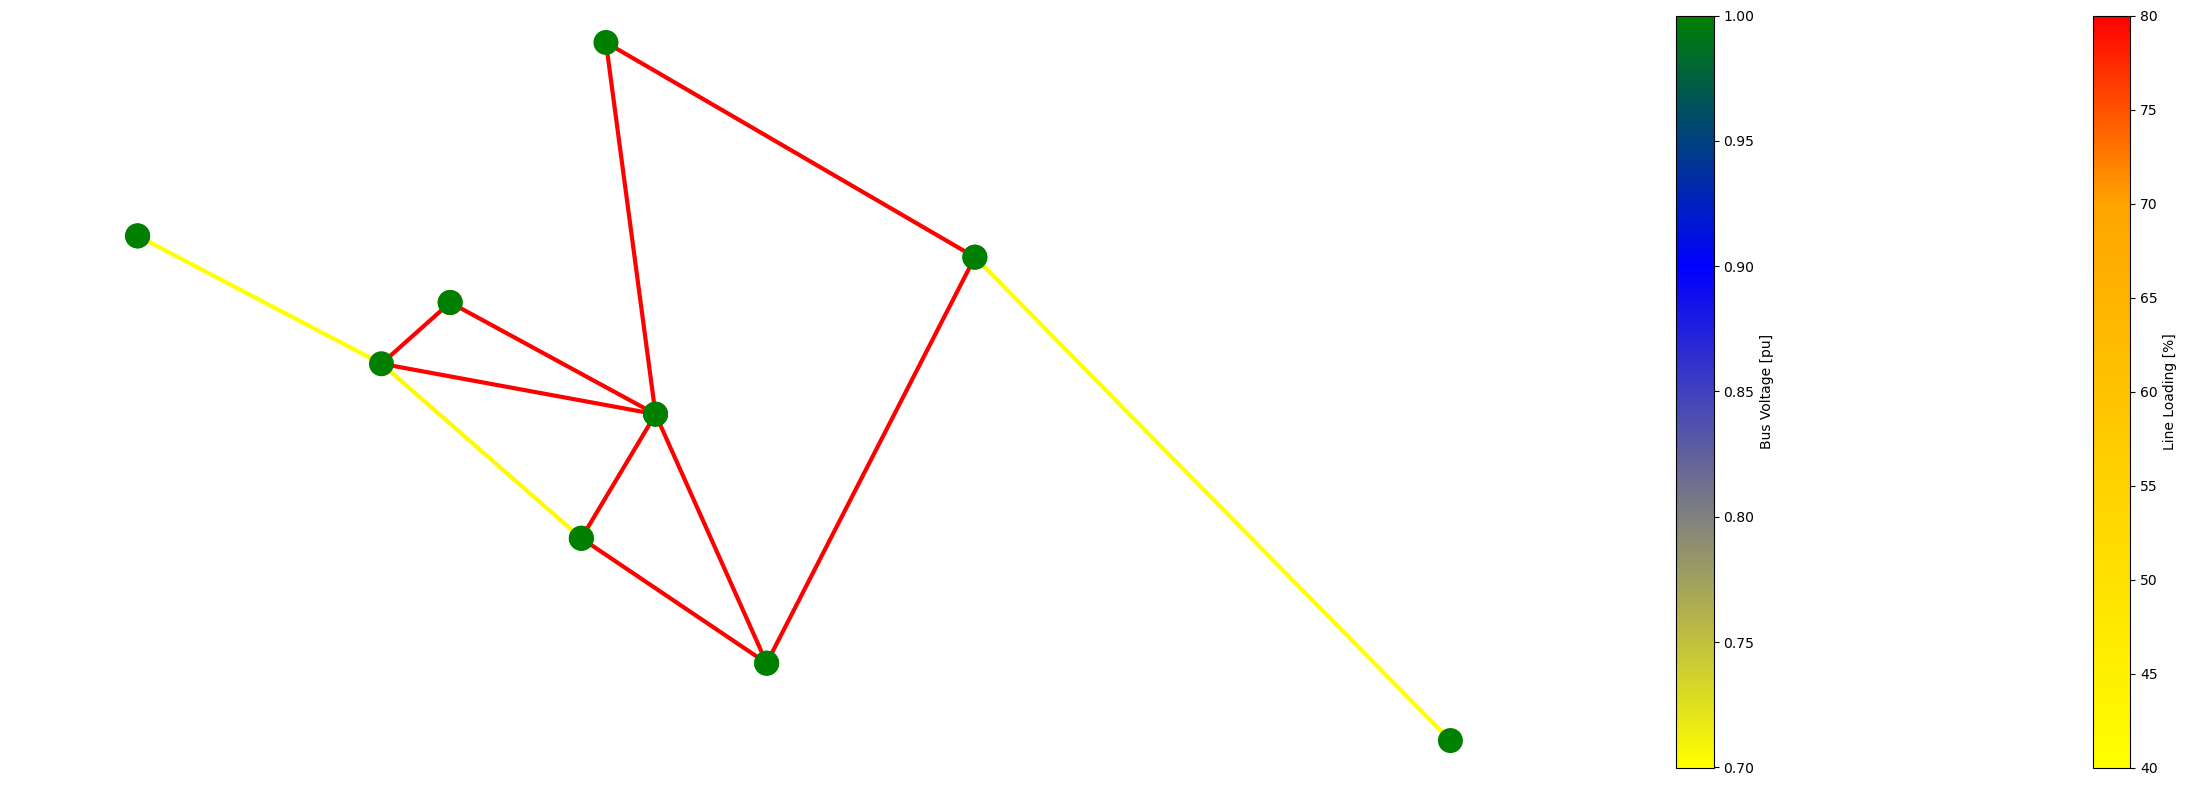

In [265]:
# Plot an advanced visual of the network showing the line loading results and voltage drops

import pandapower.plotting as plot
import matplotlib.pyplot as plt
import seaborn

# Creating the line color collection
cmap_list=[(40, "yellow"), (70, "orange"), (80, "red")]
cmap, norm = plot.cmap_continuous(cmap_list)
lc = plot.create_line_collection(net, net.line.index, zorder=1, cmap=cmap, norm=norm, linewidths=3)

# Creating the bus color collection
cmap_list=[(0.7, "yellow"), (0.9, "blue"), (1.0, "green")]
cmap, norm = plot.cmap_continuous(cmap_list)
bc = plot.create_bus_collection(net, net.bus.index, size=0.1, zorder=2, cmap=cmap, norm=norm)

plot.draw_collections([lc, bc], figsize=(25,8))

In [ ]:
#Print results to an excel file
#pp.to_excel(net, "results.xlsx") 